sample data: 
   id                                 text sentiment
0   1        The item broke within a week.  negative
1   2      Customer support was unhelpful.  negative
2   3  Very disappointed with the product.  negative
3   4  Delivery was neither fast nor slow.   neutral
4   5  Delivery was neither fast nor slow.   neutral
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         7
     neutral       0.75      1.00      0.86         6
    positive       1.00      0.71      0.83         7

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.93      0.90      0.90        20



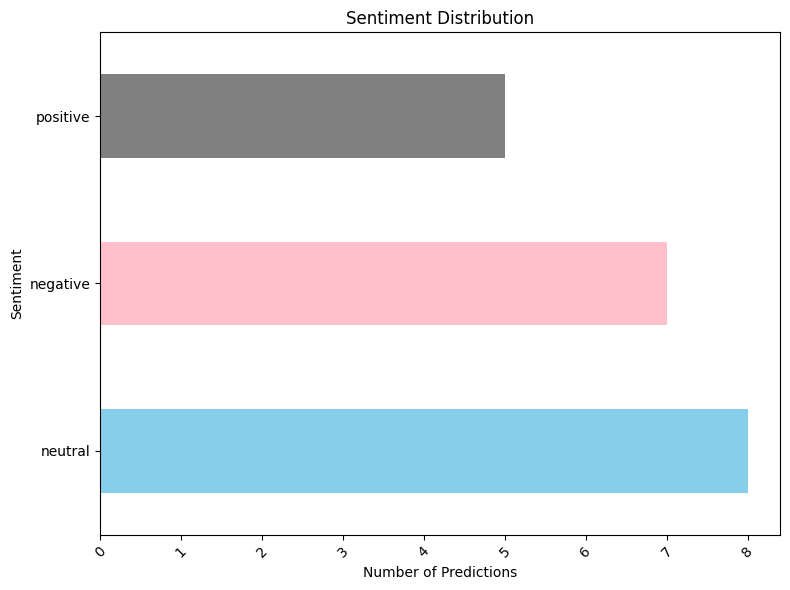

In [10]:
!pip install -q scikit-learn pandas matplotlib

# installing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# upload file for analysis
df = pd.read_csv('/content/review data.csv')
print("sample data: ")
print(df.head())

#train-test split
x = df['text']
y = df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#TF-IDF Vectorization
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf= vectorizer.transform(x_test)

#train model
model = LogisticRegression()
model.fit(x_train_tfidf, y_train)

#predict model
y_pred = model.predict(x_test_tfidf)
print(classification_report(y_test, y_pred))

#visualizing
label_counts =pd.Series(y_pred).value_counts()
plt.figure(figsize=(8, 6))
label_counts.plot(kind='barh', color=['skyblue','pink','gray'])
plt.xlabel('Number of Predictions')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()